In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df=pd.read_csv("amz_uk_price_prediction_dataset.csv")





In [2]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
frt=df['category'].value_counts()

In [4]:
frt=pd.crosstab(index=df['category'],
	columns='frequency')


In [5]:
frt['rel_frequency']=(frt['frequency']/frt['frequency'].sum())*100

In [6]:
topfrt=frt['frequency'].sort_values(ascending=False).head(5)

<Axes: xlabel='category', ylabel='frequency'>

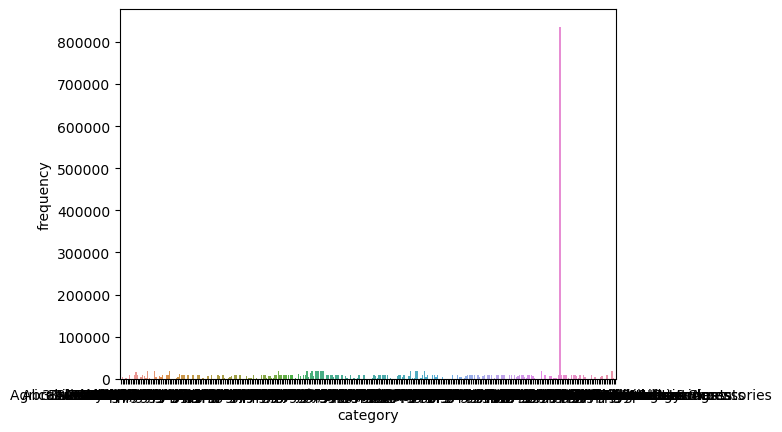

In [7]:
sns.barplot(x=frt.index,y=frt['frequency'])

In [8]:
topfrt

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: frequency, dtype: int64

<Axes: ylabel='frequency'>

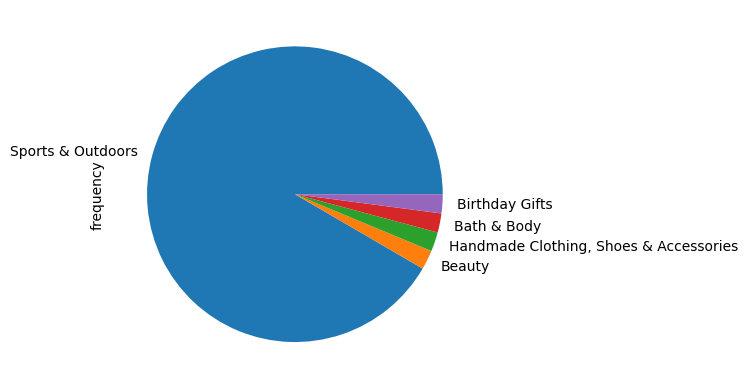

In [9]:
topfrt.plot.pie()

In [10]:
#Sport&Outdoors dominates the listings. Bar Plot visualization is difficult to read because of this abnormal value

In [11]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [12]:
mean_price=df['price'].mean()
med_price=df['price'].median()
mode_price=df['price'].mode()[0]


In [13]:
mean_price

89.24380943923663

In [14]:
med_price

19.09

In [15]:
mode_price

9.99

In [16]:
df['price'].var()

119445.48532256528

In [17]:
df['price'].std()

345.60886175352226

In [18]:
df['price'].max() - df['price'].min()

100000.0

In [19]:
pd.qcut(df['price'],q=4,labels=["low","med","high","extr"])

q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.50)  
q3 = df['price'].quantile(0.75)

q1

9.99

In [20]:
q2

19.09

In [21]:
q3

45.99

c:\Users\valte\Documents\Bootcamp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


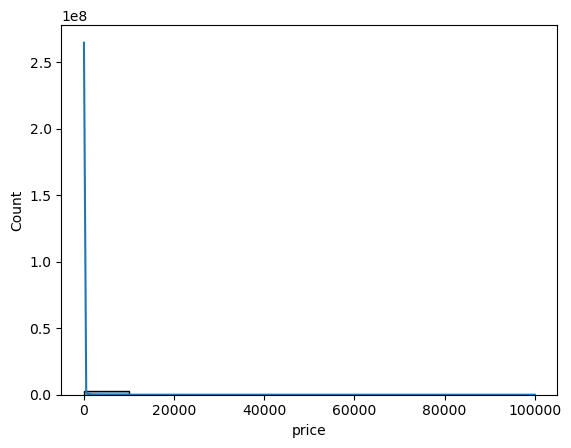

In [23]:
sns.histplot(df['price'], bins=10, kde=True)
plt.show()

<Axes: >

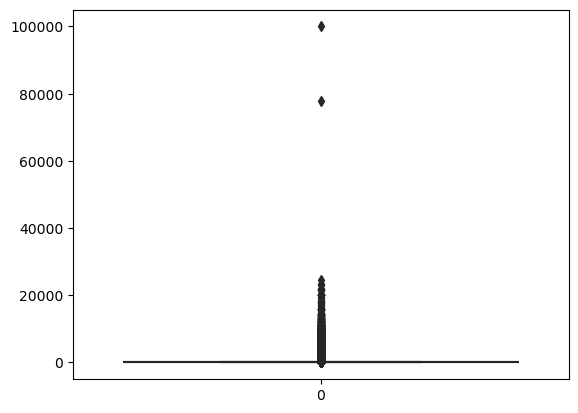

In [25]:
sns.boxplot(data=df['price'], color="green")

In [28]:
mean_rat=df['stars'].mean()
med_rat=df['stars'].median()
mode_rat=df['stars'].mode()[0]

In [29]:
mean_rat

2.152836472966065

In [30]:
med_rat

0.0

In [31]:
mode_rat

0.0

In [32]:
df.keys()

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [33]:
sk_col = df['stars'].skew()

In [35]:
sk_col

0.08120735761080985

In [36]:
kurt_col = df['stars'].kurtosis()

In [37]:
kurt_col

-1.9260061280432985

c:\Users\valte\Documents\Bootcamp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


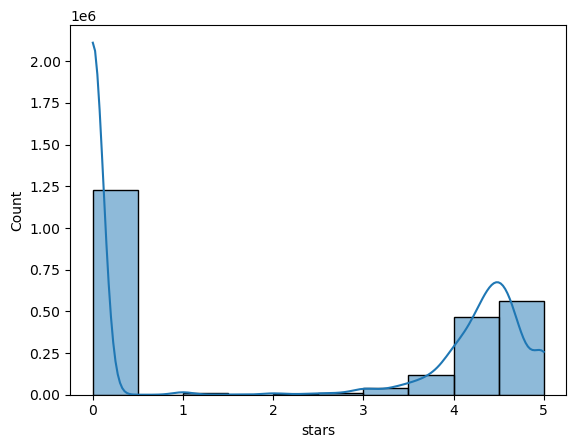

In [38]:
sns.histplot(df['stars'], bins=10, kde=True)
plt.show()

In [44]:
df['stars'].dropna(inplace=True)

c:\Users\valte\Documents\Bootcamp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


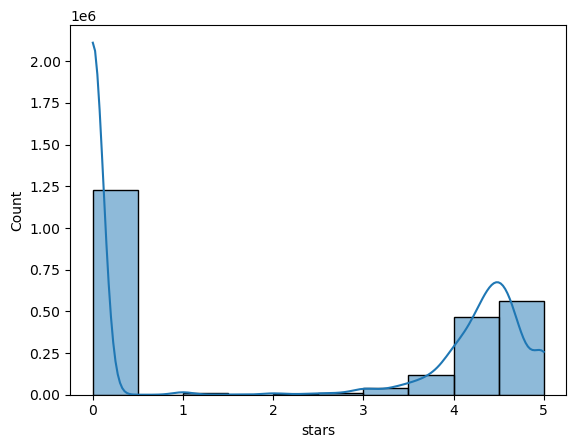

In [45]:
sns.histplot(df['stars'], bins=10, kde=True)
plt.show()